In [1]:
%matplotlib inline

import matplotlib.pylab as plt
from matplotlib.path import Path
from matplotlib.patches import Rectangle, Circle
import numpy as np

from IPython.display import clear_output
from pjdiagram import *
from ipywidgets import *

# Heap Sort

The time complexity for *heap sort* for best/worst/average is $O(n\log(n))$, which in some cases can make it a good choice when there need to be guarantees for runtime. Additionally, *heap sort* requires a constant amount of memory, as it can sort in-place.

Finally, priority queues can be built on top of the `heap_sort` by removing its for loop so the function returns a single item instead of inserting all the values into an array.

## Heaps

### Properties
Why heaps? Heaps are binary trees that have the following properties:

- root has maximum value key
- key stored at a non-root is at most the value of its parent

Therefore:
- any path from root to leaf is in nonincreasing order
- left and right sub-trees are unrelated

As discussed below, this means we can write an efficient algorithm to sort the contents of the list using these properties.

### Storage

A binary tree can be embedded within an array by defining the parent/child relationship as:

$$\texttt{parent}\left(i\right) = i/2$$
$$\texttt{left}\left(i\right) = 2*i+1$$
$$\texttt{right}\left(i\right) = 2*i+2$$

Thus, the top node is at index $0$, and the immediate children are indices $1$ (left) and $2$ (right). Following the left child (index $1$), its children are then $2*1+1 = 3$ (left) and $2*1+2 = 4$ (right). This causes each ply of the tree to be stored sequentially within the array. The figure below provides a visual demonstration.

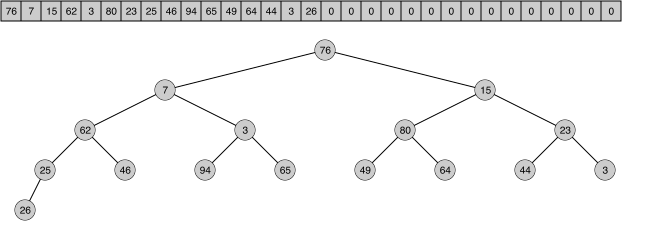

<function __main__.f>

In [2]:
contents = np.random.randint(100, size=31)

def f(size):
    with Canvas(650, 250) as ctx:
        array_contents = list(contents[:size]) + [0 for i in range(len(contents) - size)]
        draw_array(ctx, (1, 1), array_contents)
        draw_binary_tree(ctx, (325, 50), contents[:size], xdistance=20)
    
interact(f, size=(1, len(contents)))

## Algorithm

The algorithm uses the `build_heap` algorithm to transform an unordered list into a heap. While the heap still does not have the ordering that we desire, the function `heap_sort` can operate on a created heap in an efficient manner to sort the list in-place.

### Heapify
Before describing `build_heap`, we first need to define the `heapify` function which is called iteratively from `build_heap`. The `heapify` function can be called on any tree in which the left and right subtrees are proper heaps, but the root node violates the heap properties.

It might not seem like a useful operation because of the imposed precondition of both subtrees already being required to be heaps. However, if `heapify` is called iteratively on a tree, starting at the bottom non-leaf nodes, and working to the top of the tree, the result will be a proper heap for the entire tree.

#### Runtime
The run time of `heapify` is `O(log n)`, where `n` is the number of items in the list. This is because the worse case scenario will require traversing the entire height of the tree (which is `log n`).

In [3]:
def parent(i): return i/2
def left(i): return 2*i+1
def right(i): return 2*i+2

def heapify(lst, i, size):
    """
    precondition: left and right subtrees are heaps
    postcondition: makes tree at $i$ a heap
    """
    l = left(i)
    r = right(i)
 
    # if the left child is larger than parent, set largest to left
    if l < size and lst[l] > lst[i]:
        largest = l
    else:
        largest = i
 
    # if the right child is greater than the current largest, set largest
    # to right
    if r < size and lst[r] > lst[largest]:
        largest = r
 
    # if the parent isn't the largest, make it the largest, and
    # call heapify on the the child node that was altered
    if largest != i:
        lst[i], lst[largest] = lst[largest], lst[i]
        heapify(lst, largest, size)

Let's see `heapify` in action. Given the data:

```
[16, 4, 10, 14, 7, 9, 3, 2, 8, 1]
```

we have the tree depicted below. The subtree at index `1` violates the heap property. However, both the left and right subtrees are proper heaps. Thus, if we call `heapify` on index `1`, we transform our data into a proper heap. Use the arrows to run `heapify`.

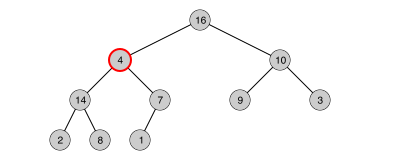

In [4]:
data = [16, 4, 10, 14, 7, 9, 3, 2, 8, 1]

reset_button = widgets.Button(
    description='',
    disabled=False,
    button_style='',
    tooltip='reset',
    layout=Layout(width='80px', height='40px'),
    icon='fa-refresh'
)

prev_button = widgets.Button(
    description='',
    disabled=False,
    button_style='',
    tooltip='go backward',
    layout=Layout(width='80px', height='40px'),
    icon='fa-chevron-left'
)

next_button = widgets.Button(
    description='',
    disabled=False,
    button_style='',
    tooltip='go forward',
    layout=Layout(width='80px', height='40px'),
    icon='fa-chevron-right'
)

def __heapify(lst, i, size):
    l = left(i)
    r = right(i)

    # if the left child is larger than parent, set largest to left
    if l < size and lst[l] > lst[i]:
        largest = l
    else:
        largest = i

    # if the right child is greater than the current largest, set largest
    # to right
    if r < size and lst[r] > lst[largest]:
        largest = r

    # if the parent isn't the largest, make it the largest, and
    # call heapify on the the child node that was altered
    if largest != i:
        lst[i], lst[largest] = lst[largest], lst[i]
        prev_index = i
        i = largest        
        return (i, prev_index)
    else:
        return None

index = 1
tree = list(data)
prev_trees = []
prev_indices = []

with Canvas(400, 155) as ctx:
    draw_binary_tree(ctx, (200, 20), data, highlight={index:True})

def on_reset(b):
    global tree, prev_trees, prev_indices, index
    tree = list(data)
    prev_trees = []
    prev_indices = []
    index = 1
    
    clear_output()
    with Canvas(400, 155) as ctx:
        draw_binary_tree(ctx, (200, 20), tree)

def on_next(b):
    global tree, index
    
    clear_output()
    
    prev_tree = list(tree)
    indices = __heapify(tree, index, len(tree))  
    if indices != None:
        next_index, swap_index = indices
        prev_trees.append(list(prev_tree))
        prev_indices.append(index)
        index = next_index
        highlight={next_index:True, swap_index:True}
    else:
        highlight = {index:True}

    with Canvas(400, 155) as ctx:
        draw_binary_tree(ctx, (200, 20), tree, highlight=highlight)
        
def on_prev(b):
    global tree, index
    
    clear_output()
    
    swap_index = index
    if len(prev_trees) > 0: 
        tree = prev_trees.pop()
        index = prev_indices.pop()
        highlight = {index:True, swap_index:True} 
    else:
        highlight = {}
            
    with Canvas(400, 155) as ctx:
        draw_binary_tree(ctx, (200, 20), tree, xdistance=20, highlight=highlight)
    
next_button.on_click(on_next)
prev_button.on_click(on_prev)
reset_button.on_click(on_reset)

controls = HBox([prev_button, next_button, reset_button])
display(controls)

### Building a heap

If we start at the bottom non-leaf nodes and run `heapify` on each one, all the bottom subtrees will be proper heaps. If we then run `heapify` on the bottom non-leaf node's parents, because the most-bottom subtrees are proper heaps, they too will become proper heaps. If we continue to do this, going up one parent at a time, the entire tree becomes a proper heap.

In [5]:
def build_heap(lst):
    # start at bottom and work up for each node
    nonleaf_nodes = len(lst)/2
    for i in range(nonleaf_nodes-1, -1, -1):
        heapify(lst, i, len(lst)) 

Let's see `build_heap` in action:

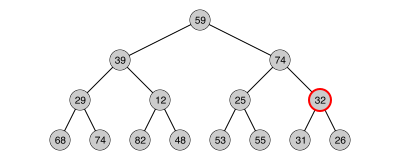

In [6]:
data = np.random.randint(100, size=15)

reset_button = widgets.Button(
    description='',
    disabled=False,
    button_style='',
    tooltip='reset',
    layout=Layout(width='80px', height='40px'),
    icon='fa-refresh'
)

prev_button = widgets.Button(
    description='',
    disabled=False,
    button_style='',
    tooltip='go backward',
    layout=Layout(width='80px', height='40px'),
    icon='fa-chevron-left'
)

next_button = widgets.Button(
    description='',
    disabled=False,
    button_style='',
    tooltip='go forward',
    layout=Layout(width='80px', height='40px'),
    icon='fa-chevron-right'
)

tree = list(data)
prev_trees = []
prev_indices = []

nonleaf_nodes = len(tree)/2
index = nonleaf_nodes-1

with Canvas(400, 155) as ctx:
    draw_binary_tree(ctx, (200, 20), data, highlight={index:True})

def on_reset(b):
    global tree, prev_trees, prev_indices, index
    tree = np.random.randint(100, size=15)
    prev_trees = []
    prev_indices = []
    index = nonleaf_nodes-1
    
    clear_output()
    with Canvas(400, 155) as ctx:
        draw_binary_tree(ctx, (200, 20), tree, highlight={index:True})

def on_next(b):
    global tree, index
    
    clear_output()
    
    highlight={index:True}
    if index >= 0:
        prev_tree = list(tree)
        prev_trees.append(list(prev_tree))
        prev_indices.append(index)
        heapify(tree, index, len(tree))        
        index -= 1        

    with Canvas(400, 155) as ctx:
        draw_binary_tree(ctx, (200, 20), tree, highlight=highlight)
        
def on_prev(b):
    global tree, index
    
    clear_output()
     
    if len(prev_trees) > 0: 
        tree = prev_trees.pop()
        index = prev_indices.pop()
        
    highlight = {index:True}
            
    with Canvas(400, 155) as ctx:
        draw_binary_tree(ctx, (200, 20), tree, highlight=highlight)


next_button.on_click(on_next)
prev_button.on_click(on_prev)
reset_button.on_click(on_reset)

controls = HBox([prev_button, next_button, reset_button])
display(controls)

Talk about $O(n\log(n))$.

### Putting it all together

While we now have a method of constructing a proper heap, we do not yet have a sorted list. However, we know two things:
1. The root node is the largest value in the tree
2. If we remove the top node, we can run `heapify` with a runtime of $O(n\log(n))$ to return our tree to a proper heap.

Thus our algorithm is:
1. Create a new list the size of tree
2. Repeat until tree is empty:
    - Remove the top node in thre tree and put it in our new list    
    - Run heapify on the remaining tree (remembering to decrement the total size by 1)

In [7]:
def heap_sort(lst):
    build_heap(lst)
 
    # build up list starting from largset at back to smallest up front
    for i in range(len(lst)-1, 0, -1):      
        # move largest value to the back
        lst[0], lst[i] = lst[i], lst[0]     
                 
        # re-heapify tree
        heapify(lst, 0, i)
 
    return lst

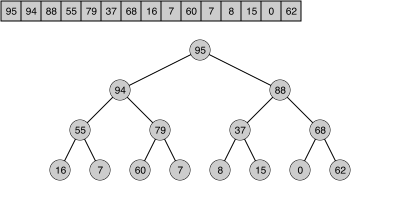

In [8]:
data = np.random.randint(100, size=15)
contents = [0 for _ in range(15)]
build_heap(data)

reset_button = widgets.Button(
    description='',
    disabled=False,
    button_style='',
    tooltip='reset',
    layout=Layout(width='80px', height='40px'),
    icon='fa-refresh'
)

prev_button = widgets.Button(
    description='',
    disabled=False,
    button_style='',
    tooltip='go backward',
    layout=Layout(width='80px', height='40px'),
    icon='fa-chevron-left'
)

next_button = widgets.Button(
    description='',
    disabled=False,
    button_style='',
    tooltip='go forward',
    layout=Layout(width='80px', height='40px'),
    icon='fa-chevron-right'
)

tree = list(data)
prev_trees = []
prev_indices = []

nonleaf_nodes = len(tree)/2
index = len(tree)-1

with Canvas(400, 200) as ctx:
    draw_array(ctx, (1, 1), tree)
    draw_binary_tree(ctx, (200, 50), tree)

def on_reset(b):
    global tree, prev_trees, prev_indices, index
    tree = np.random.randint(100, size=15)
    prev_trees = []
    prev_indices = []
    index = len(tree)-1
    
    clear_output()
    with Canvas(400, 200) as ctx:
        draw_array(ctx, (1, 1), contents)
        draw_binary_tree(ctx, (200, 50), tree, highlight={index:True})

def on_next(b):
    global tree, index
    
    clear_output()
    
    highlight={index:True}
    if index >= 0:
        prev_tree = list(tree)
        prev_trees.append(list(prev_tree))
        prev_indices.append(index)
        
        tree[0], tree[index] = tree[index], tree[0]
        heapify(tree, 0, index)        
        index -= 1        

    with Canvas(400, 200) as ctx:
        draw_array(ctx, (1, 1), tree)
        draw_binary_tree(ctx, (200, 50), tree, highlight=highlight)
        
def on_prev(b):
    global tree, index
    
    clear_output()
     
    if len(prev_trees) > 0: 
        tree = prev_trees.pop()
        index = prev_indices.pop()
        
    highlight = {index:True}
            
    with Canvas(400, 200) as ctx:
        draw_array(ctx, (1, 1), tree)
        draw_binary_tree(ctx, (200, 50), tree, highlight=highlight)


next_button.on_click(on_next)
prev_button.on_click(on_prev)
reset_button.on_click(on_reset)

controls = HBox([prev_button, next_button, reset_button])
display(controls)

In [9]:
def parent(i): return i/2
def left(i): return 2*i+1
def right(i): return 2*i+2

def heap_sort(lst):
    build_heap(lst)
 
    # build up list starting from largset at back to smallest up front
    for i in range(len(lst)-1, 0, -1):      
        # move largest value to the back
        lst[0], lst[i] = lst[i], lst[0]     
                 
        # re-heapify tree
        heapify(lst, 0, i)
 
    return lst


def build_heap(lst):
    # start at bottom and work up for each node
    nonleaf_nodes = len(lst)/2
    for i in range(nonleaf_nodes-1, -1, -1):
        heapify(lst, i, len(lst))       
 

def heapify(heap, i, size):
    l = left(i)
    r = right(i)
    
    # if the left child is larger than the parent, set largest to left
#     largest = (l if l < size and heap[l] > heap[i] else i)
    if l < size and lst[l] > lst[i]:
        largest = l
    else:
        largest = i
    
    # if the right child is greater than the current largest, 
    # set larget to right
    if r < size and heap[r] > heap[largest]:
        largest = r
        
    # if the parent isn't the largest, make it the largest, and
    # call heapify on the child node that was altered
    if largest != i:
        data[i], data[largest] = data[largest], data[i]
        heapify(data, largest, size)